<h1 style="font-size:3rem;color:#6667AB;">TP 6</h1>

## Méthodes de Simulation Informatique
### Amaya Nogales Gómez

<h2> Techniques de validation </h2> 

In [1]:
#we import all the required libraries
import numpy as np
import matplotlib.pyplot as plt # for plotting stuff
from random import seed, shuffle
from scipy.stats import multivariate_normal # for generating synthetic data 
from sklearn.svm import SVC
from sklearn import datasets #For real datasets
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import math
SEED = 1122334455
seed(SEED) # set the random seed so that the random permutations can be reproduced again
np.random.seed(SEED)

In [2]:
def generate_synthetic_data(n_samples):

    """
        Code for generating the synthetic data.
        We will have two non-sensitive features and one sensitive feature.
        A sensitive feature value of 0.0 means the example is considered to be in protected group (e.g., female) and 1.0 means it's in non-protected group (e.g., male).
    """

    #n_samples = 100 # generate these many data points per class
    
    def gen_gaussian(size, mean_in, cov_in, class_label):
        nv = multivariate_normal(mean = mean_in, cov = cov_in)
        X = nv.rvs(size)
        y = np.ones(size, dtype=int) * class_label
        return nv,X,y

    """ Generate the features randomly """
    #For the NON-protected group (men)
    # We will generate one gaussian cluster for each class
    mu1, sigma1 = [2, 2], [[5, 1], [1, 5]]
    mu2, sigma2 = [-2,-2], [[10, 1], [1, 3]]
    nv1, X1, y1= gen_gaussian(int(n_samples), mu1, sigma1, 1) # positive class
    nv2, X2, y2= gen_gaussian(int(n_samples),mu2, sigma2, 0) # negative class
    
    

    

    # join the positive and negative class clusters
    X = np.vstack((X1, X2))
    y = np.hstack((y1, y2))
    

    # shuffle the data
    perm = list(range(0,n_samples*2))
    shuffle(perm)
    X = X[perm]
    y = y[perm]
    

    return X,y

In [3]:
n_size=50
X_syn, y_syn = generate_synthetic_data(n_size) 

In [4]:
#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]



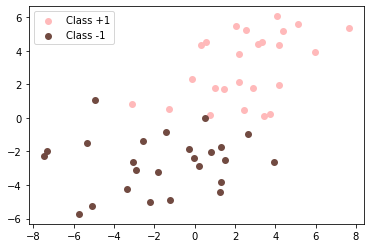

In [5]:
plt.scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
plt.scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")


plt.legend(loc=2, fontsize=10)

plt.show()

Nous calculons maintenant le classifieur SVM pour 3 valeurs différentes de $C$ :


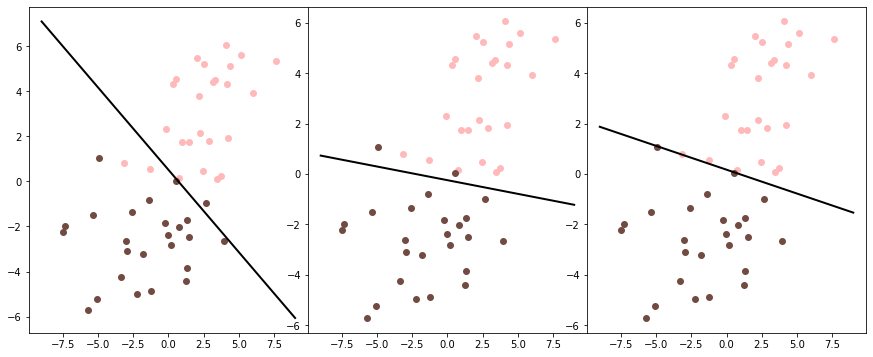

In [6]:
# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin
fig, axs = plt.subplots(1,3, figsize=(15, 6), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
C_i=[0.00001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
mse_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)

    
    axs[i].scatter(X_syn_training[y_syn_training==1][:, 0], X_syn_training[y_syn_training==1][:, 1], color='#FFB9BA', marker='o', s=30, linewidth=1.5, label= "Class +1")
    axs[i].scatter(X_syn_training[y_syn_training==0][:, 0], X_syn_training[y_syn_training==0][:, 1], color='#714A41', marker='o', s=30, linewidth=1.5, label = "Class -1")
    #plot_svc_decision_boundary(svm_clf, -2, 2)
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(-9, 9, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    axs[i].plot(x0, decision_boundary, "k-", linewidth=2)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)
    
    
plt.show() 

In [7]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

		     C_1 C_2 C_3
Accuracy training   [ 94.  96. 100.]
Accuracy testing    [ 80. 100. 100.]
Accuracy validation [88. 88. 88.]


Pour rapporter la précision finale de cet ensemble de données, nous devons :

1-Entraînez le SVM pour tous les jeux de données k (dans notre cas k=1) et tous les Cs.

2-Choisissez $C^*$ comme celui donnant la précision maximale dans l'ensemble de test.

3-Rapportez la précision dans l'ensemble de validation.

In [8]:
max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy=Accuracy_validation[i_loc]
print("The accuracy in the studied dataset is %.2f" %Final_accuracy)

The accuracy in the studied dataset is 88.00


## Question:

**1-** Répétez le même experiment pour n_samples=100. Rapportez la précision finale.

**2-** Que se passe-t-il avec le premier classificateur ?

**3-** Modifiez l'intervalle de valeurs des paramètres pour $C$ et répétez 1. Par exemple : $C_i[0]=0,001$.

Si nous répétons à nouveau les mêmes calculs en mélangeant les données, nous ferons Repeated Random Subsampling pour 2 iterations.

Ensuite, pour le rapport des résultats, nous fournirons la moyenne et la variance des précisions entre les differents iterations.

In [9]:

#Instance 1:

n_size=100
X_syn, y_syn = generate_synthetic_data(n_size) 

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]

C_i=[0.001,1,100000]
C_range=np.shape(C_i)[0]
Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
Final_accuracy=np.empty(2)
for i in range(C_range):
    
    #axs[i].contourf(np.random.rand(10,10),5,cmap=plt.cm.Oranges)
    #axs[i].set_title(str(250+i))
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
    
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)


print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy[0]=Accuracy_validation[i_loc]


#Instance 2:
#We shuffle the data, we do NOT generate new data:
perm = list(range(0,n_size*2))
shuffle(perm)
X_syn = X_syn[perm]
y_syn = y_syn[perm]

#Generate training, testing and validation:
n=np.shape(X_syn)[0]
n_train=int(0.5*n)

X_syn_training=X_syn[0:n_train,:]
y_syn_training=y_syn[0:n_train]

X_syn_testing=X_syn[n_train:(n_train+math.floor((n-n_train)/2)),:]
y_syn_testing=y_syn[n_train:(n_train+math.floor((n-n_train)/2))]

X_syn_validation=X_syn[(n_train+math.floor((n-n_train)/2)):n,:]
y_syn_validation=y_syn[(n_train+math.floor((n-n_train)/2)):n]


		     C_1 C_2 C_3
Accuracy training   [85. 88. 88.]
Accuracy testing    [76. 82. 82.]
Accuracy validation [78. 80. 80.]


In [10]:
#And we solve the correspondins SVMS

# SVM Classifier model
#the hyperparameter C control the margin violations
#smaller C leads to more margin violations but wider margin

Accuracy_training=np.empty([C_range])
Accuracy_testing=np.empty([C_range])
Accuracy_validation=np.empty([C_range])
for i in range(C_range):
    
    
    svm_clf = SVC(kernel="linear", C=C_i[i])
    svm_clf.fit(X_syn_training, y_syn_training)
  
    y_pred_training=svm_clf.predict(X_syn_training)
    y_pred_testing=svm_clf.predict(X_syn_testing)
    y_pred_validation=svm_clf.predict(X_syn_validation)

 
    Accuracy_training[i]=(metrics.accuracy_score(y_syn_training, y_pred_training)*100)
    Accuracy_testing[i]=(metrics.accuracy_score(y_syn_testing, y_pred_testing)*100)
    Accuracy_validation[i]=(metrics.accuracy_score(y_syn_validation, y_pred_validation)*100)
    
    


In [11]:
print("\t\t     C_1 C_2 C_3")
print("Accuracy training  ",Accuracy_training)
print("Accuracy testing   ",Accuracy_testing)
print("Accuracy validation",Accuracy_validation)

max_t=max(Accuracy_testing)
i_loc=np.where(Accuracy_testing>=max_t)
i_loc=i_loc[0][0]

Final_accuracy[1]=Accuracy_validation[i_loc]
print("La précision dans la première iteration est %.2f" %Final_accuracy[0])
print("La précision dans la deuxième iteration est %.2f" %Final_accuracy[1])
print("La précision moyenne est  %.2f" %np.mean(Final_accuracy))
print("La variance de précision est %.2f" %np.var(Final_accuracy))


		     C_1 C_2 C_3
Accuracy training   [79. 85. 85.]
Accuracy testing    [82. 76. 76.]
Accuracy validation [92. 88. 88.]
La précision dans la première iteration est 80.00
La précision dans la deuxième iteration est 92.00
La précision moyenne est  86.00
La variance de précision est 36.00


## Questions:

**4-** Répétez la même repeated random subsampling mais en modifiant la taille d'échantillon d'entraînement, de test et de validation.

Maintenant, nous avons :<br />
apprentissage 50%<br />
test 25%<br />
validation 25%<br />

Modifiez-le comme suit :<br />

formation 40%<br />
test 30%<br />
validation 30%<br />


**5-** Obtenez-vous une meilleure solution ?


**6-** Calculez les resultats (precision moyenne et variance) avec repeated random subsampling pour 10 iterations, n_samples=100, 5 valeurs de $C$ pour:

apprentissage 50%<br />
test 25%<br />
validation 25%<br />

**7-** Repetez 6 pour la technique de validation K-fold crossvalidation pour k=10.

**8-** Quelle technique vous donne les meilleurs résultats ? Justifiez votre réponse.
